# **Predicting Diabetes using PIMA Diabetes Dataset**
---

# **Importing libraries and files**
---

In [34]:
# to get file location
import os

# statistical work
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# optimization
from sklearn.feature_selection import SelectFromModel

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost

# cross validation
from sklearn.model_selection import cross_val_score

# checking results
from sklearn.metrics import accuracy_score

%matplotlib inline

In [35]:
# reading data
df = pd.read_csv("data.csv")

In [36]:
# viewing data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# looking at data dimension
df.shape

(768, 9)

# **Data Cleaning**
---

## **1. Cleaning Null Values**

In [38]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- As there are no null values, we can proceed with data preprocessing.

# **Data Preprocessing**
---

## **1. Splitting Data**

In [39]:
# dropping output column
X = df.drop("Outcome", axis = 1)

# considering only output column
y = df["Outcome"]

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## **2. Filling "0" values if any**

In [40]:
fill_values = SimpleImputer(missing_values = 0, strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

## **3. Feature Selection**

### **Correlation**

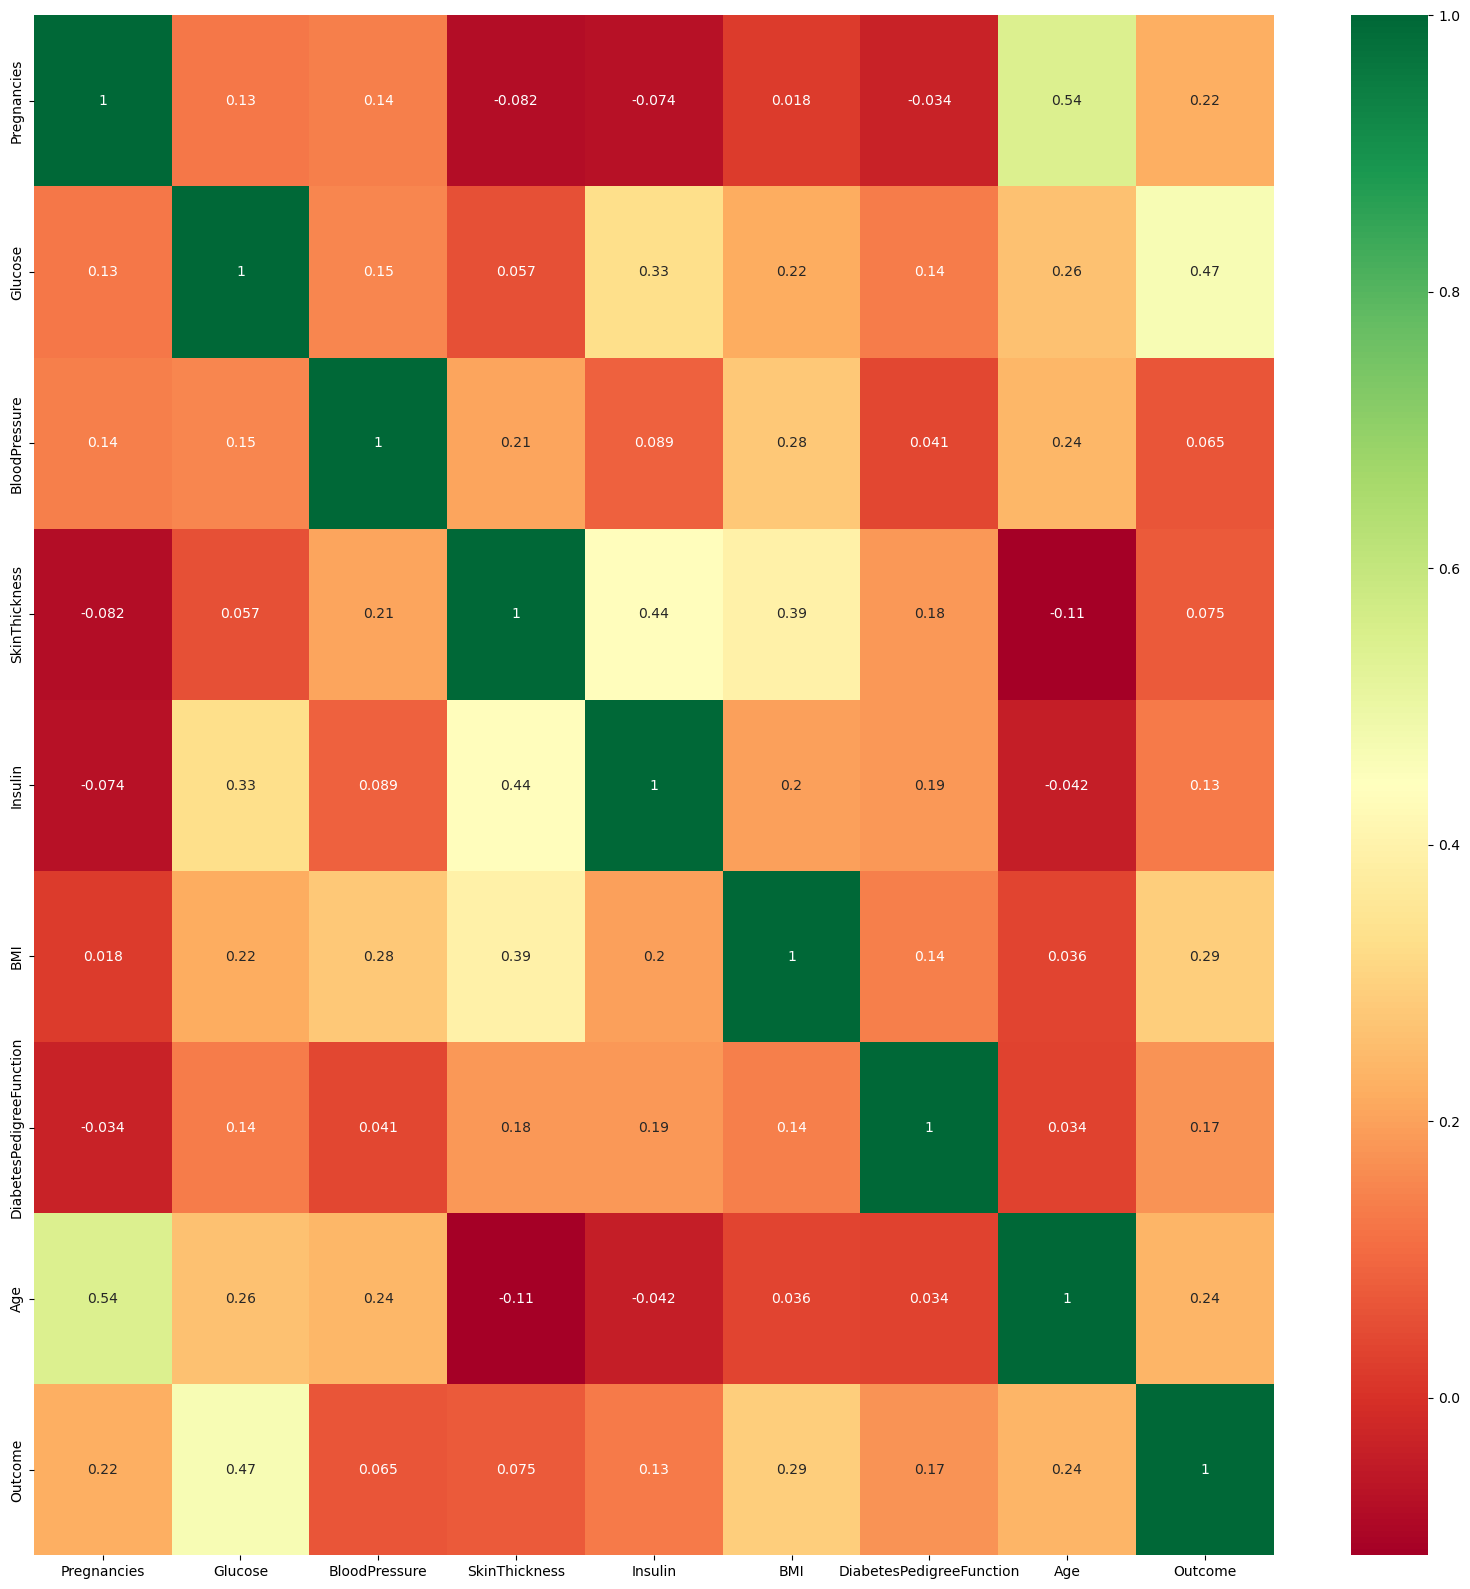

In [41]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## **4. Standardizing Data**

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Prediction**
---

## **1. Regression Model**

In [44]:
# building a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = lr_model.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Regression Accuracy: {0: 0.5f}".format(accuracy))

Regression Accuracy:  0.73593


### **`OPT` : L1 Regularization**

In [45]:
out = SelectFromModel(LogisticRegression(penalty="l1", C = 10, solver="liblinear"))
out.fit(X_train, y_train)

print(out.get_feature_names_out())
print("Total relevant features:",len(out.get_feature_names_out()))

['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7']
Total relevant features: 8


- Since there is no change in the number of features, there will be no improvement in accuracy.

### **`OPT` : L2 Regularization**

In [46]:
out = SelectFromModel(LogisticRegression(penalty="l2", C = 10, solver="liblinear"))
out.fit(X_train, y_train)

print(out.get_feature_names_out())
print("Total relevant features:",len(out.get_feature_names_out()))

['x1' 'x5' 'x7']
Total relevant features: 3


In [47]:
X_train_l2 = out.transform(X_train)
X_test_l2 = out.transform(X_test)

lr_l2_model = LogisticRegression()
lr_l2_model.fit(X_train_l2, y_train)

y_pred_l2 = lr_l2_model.predict(X_test_l2)

accuracy = accuracy_score(y_test, y_pred_l2)
print("Regression Accuracy (L2 Regularized):{0: 0.5f}".format(accuracy))

Regression Accuracy (L2 Regularized): 0.73160


## **2. SVM Model**

In [48]:
# building an SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# making predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# evaluating the model's accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:{0: 0.5f}".format(accuracy_svm))

SVM Accuracy: 0.72727


## **3. KNN Model**

In [49]:
# building a function to test best neighbour 
def KNN(k):
    # building a KNN model (default k=5)
    knn_model = KNeighborsClassifier(n_neighbors = k)

    # fitting the model to the training data
    knn_model.fit(X_train, y_train)

    # making predictions on the test set
    y_pred_knn = knn_model.predict(X_test)

    # evaluating the model's accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print("KNN Accuracy:{0: 0.5f} for K = {1}".format(accuracy_knn,k))

In [50]:
# finding the best n value
k_values = [5,6,7,8,9,10,11,12,13,14,15]

for k in k_values:
    KNN(k)

KNN Accuracy: 0.70130 for K = 5
KNN Accuracy: 0.73160 for K = 6
KNN Accuracy: 0.70996 for K = 7
KNN Accuracy: 0.71861 for K = 8
KNN Accuracy: 0.70563 for K = 9
KNN Accuracy: 0.69697 for K = 10
KNN Accuracy: 0.73160 for K = 11
KNN Accuracy: 0.73160 for K = 12
KNN Accuracy: 0.74026 for K = 13
KNN Accuracy: 0.73593 for K = 14
KNN Accuracy: 0.73593 for K = 15


In [51]:
KNN(15)

KNN Accuracy: 0.73593 for K = 15


- Best accuracy was obtained at **k = 13**. 

## **4. Decision Tree Classifier**

In [52]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model's accuracy
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:{0: 0.5f}".format(accuracy_dt))

Decision Tree Accuracy: 0.71861


## **5. Random Forest Classifier**

In [53]:
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train.ravel())

y_pred_rfc = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Accuracy = {0:.5f}".format(accuracy_rf))

Random Forest Accuracy = 0.76623


### **`OPT` : Hyper Parameter Optimization**

In [54]:
params={
 "n_estimators"     : [90, 100, 110, 120, 130],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [55]:
classifier = xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=15,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y.ravel())
random_search.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## **6. XGBoost**

In [56]:
classifier = xgboost.XGBClassifier(colsample_bytree=0.3, enable_categorical=False, gamma=0.4,
                                   learning_rate=0.1, max_depth=4, min_child_weight=7,n_estimators=110, random_state=42)

In [57]:
score = cross_val_score(classifier,X,y.ravel(),cv=10)
accuracy_xbg = score.mean()
print("XGBoost Accuracy = {0:.5f}".format(accuracy_xbg))

XGBoost Accuracy = 0.74621
